In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile

dataset = "/content/cifar-10.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()

print("The Dataset is extracted")

The Dataset is extracted


In [6]:
!pip install py7zr

In [7]:
import py7zr

archive = py7zr.SevenZipFile("/content/train.7z", mode="r")
archive.extractall()
archive.close()

Importing Dependencies


In [8]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , BatchNormalization , Dropout , Conv2D , MaxPooling2D
import os

In [9]:
filenames = os.listdir("/content/train")

In [10]:
type(filenames)

list

In [11]:
len(filenames)

50000

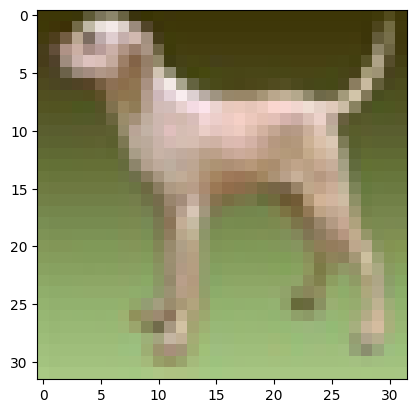

In [12]:
img = mpimg.imread("/content/train/10000.png")
plt.imshow(img)
plt.show()

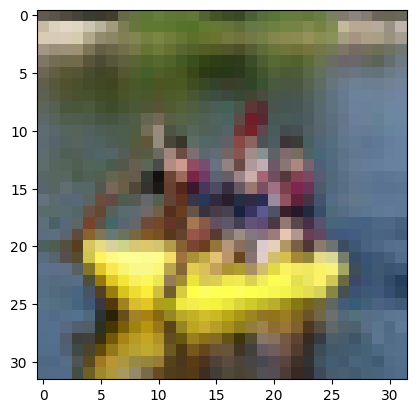

In [13]:
img2 = mpimg.imread("/content/train/10004.png")
plt.imshow(img2)
plt.show()

In [14]:
img2.shape

(32, 32, 3)

In [15]:
img_file = filenames[:10]

img_file

['3803.png',
 '16853.png',
 '13371.png',
 '10940.png',
 '43482.png',
 '34747.png',
 '1572.png',
 '27092.png',
 '2403.png',
 '40157.png']

In [16]:
img_file2 = filenames[-10:]

img_file2

['38018.png',
 '38584.png',
 '46047.png',
 '25533.png',
 '31138.png',
 '48184.png',
 '42729.png',
 '10744.png',
 '4731.png',
 '8414.png']

In [17]:
labels_df = pd.read_csv("/content/trainLabels.csv")

labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [19]:
labels_df["label"].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [20]:
labels_df["label"]

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [21]:
labels_dictionary = {"airplane":0, "automobile":1, "bird":2, "cat":3 , "deer":4, "dog":5, "frog":6,"horse":7,"ship":8,"truck":9}

labels = [labels_dictionary[i] for i in labels_df["label"]]

In [22]:
print(labels[:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [23]:
print(labels[-10:])

[4, 2, 0, 1, 0, 2, 6, 9, 1, 1]


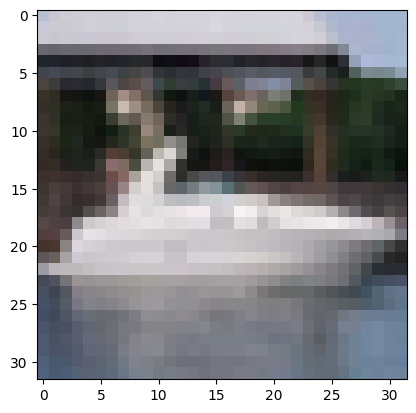

In [24]:
# displaying sample image

img = mpimg.imread("/content/train/26644.png")
plt.imshow(img)
plt.show()

In [25]:
labels_df[labels_df["id"] == 26644]

,id,label
26643,26644,ship


In [26]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [27]:
id_list = list(labels_df["id"])

Image Processing

In [28]:
# convert images to numpy arrays

train_data_folder = "/content/train/"

data =[]

for id in id_list:

  image = Image.open(train_data_folder + str(id) + ".png")
  image = np.array(image)
  data.append(image)



In [29]:
type(data)

list

In [30]:
len(data)

50000

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
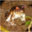

In [33]:
data[0]

In [34]:
X = np.array(data)
y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
type(y)


numpy.ndarray

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

In [38]:
X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

Building Neural Network

In [45]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation="relu"))


model.add(Dense(10,activation="softmax"))

In [46]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [47]:
nn_model = model.fit(X_train_scaled , y_train , epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4652 - loss: 1.5545
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6667 - loss: 0.9558
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7290 - loss: 0.7765
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7755 - loss: 0.6494
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8087 - loss: 0.5465
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8433 - loss: 0.4520
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8724 - loss: 0.3660
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8915 - loss: 0.3106
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9149 - loss: 0.2455
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9195 - loss: 0.2257
